In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import json
import math
import bitlist

In [2]:
files = os.listdir('./result')

In [3]:
result_data = []
for f in files:
    if not f.startswith('R_'):
        continue
    fp = open('./result/'+f,'r')
    result_data.append(json.load(fp))
    fp.close()

In [4]:
reload(bitlist)

<module 'bitlist' from 'bitlist.pyc'>

In [5]:
dataframe = pd.DataFrame()
for data in result_data:
    _df = pd.DataFrame(data)
    dataframe = pd.concat([dataframe, _df])

In [7]:
dataframe['method'] = dataframe.index
dataframe['non_zero_sqrt'] = dataframe.non_zero_num.apply(np.sqrt)
dataframe['volume'] = dataframe.traj_num * dataframe.leaf_number
dataframe['size_4'] = (dataframe['4']*(32+4.0)+dataframe['leaf_number']*192 )/ (1024**2)
dataframe['size_8'] = (dataframe['8']*(32+8.0)+dataframe['leaf_number']*192 ) / (1024**2)
dataframe['size_16'] = (dataframe['16']*(32+16.0)+dataframe['leaf_number']*192 ) / (1024**2)
dataframe['size_32'] = (dataframe['32']*(32+32.0)+dataframe['leaf_number']*192 ) / (1024**2)
dataframe['size_64'] = (dataframe['64']*(32+64.0)+dataframe['leaf_number']*192 ) / (1024**2)
dataframe['compress_rate_4'] = dataframe['size_4']*(1024**2) / (dataframe['non_zero_num']*64)
dataframe['compress_rate_8'] = dataframe['size_8']*(1024**2) / (dataframe['non_zero_num']*64)
dataframe['compress_rate_16'] = dataframe['size_16']*(1024**2) / (dataframe['non_zero_num']*64)
dataframe['compress_rate_32'] = dataframe['size_32']*(1024**2) / (dataframe['non_zero_num']*64)
dataframe['compress_rate_64'] = dataframe['size_64']*(1024**2) / (dataframe['non_zero_num']*64)
dataframe['non_zero_rate'] = dataframe['non_zero_num']*1.0/(dataframe['traj_num']*dataframe['leaf_number'])

In [8]:
dataframe[dataframe.traj_num == 100000]

,16,32,4,64,8,leaf_number,max_nodes,non_zero_num,traj_num,type,...,size_8,size_16,size_32,size_64,compress_rate_4,compress_rate_8,compress_rate_16,compress_rate_32,compress_rate_64,non_zero_rate
bits_random,2677890.000000,2615375.000000,2726306.000000,2497152.000000,2710473.000000,13820,500,2739058,100000,short,...,105.926857,125.114594,162.160339,231.151611,0.575018,0.633614,0.748388,0.969981,1.382661,0.001982
bits_sort,2448431.000000,2246396.000000,2660990.000000,1957276.000000,2579175.000000,13820,500,2739058,100000,short,...,100.918236,114.610794,139.639648,181.724487,0.561604,0.603654,0.685558,0.835271,1.087007,0.001982
bits_sort_time,5.389838,5.389838,5.389838,5.389838,5.389838,13820,500,2739058,100000,short,...,2.530723,2.530764,2.530847,2.531011,0.015138,0.015138,0.015138,0.015139,0.015140,0.001982
bits_tree_dfs,2383332.000000,2208592.000000,2595777.000000,1963369.000000,2507213.000000,13820,500,2739058,100000,short,...,98.173103,111.630798,137.332275,182.282318,0.548212,0.587234,0.667733,0.821469,1.090343,0.001982
bits_tree_dfs_depth,2336878.000000,2115930.000000,2589786.000000,1814179.000000,2487458.000000,13820,500,2739058,100000,short,...,97.419510,109.504303,131.676636,168.623566,0.546982,0.582726,0.655013,0.787639,1.008642,0.001982
bits_tree_dfs_depth_time,2.791016,2.791016,2.791016,2.791016,2.791016,13820,500,2739058,100000,short,...,2.530624,2.530645,2.530688,2.530773,0.015137,0.015137,0.015137,0.015138,0.015138,0.001982
bits_tree_dfs_time,1.198646,1.198646,1.198646,1.198646,1.198646,13820,500,2739058,100000,short,...,2.530563,2.530572,2.530591,2.530627,0.015137,0.015137,0.015137,0.015137,0.015137,0.001982
bits_unsort,2677921.000000,2614695.000000,2726767.000000,2496986.000000,2710601.000000,13820,500,2739058,100000,short,...,105.931740,125.116013,162.118835,231.136414,0.575112,0.633643,0.748396,0.969733,1.382570,0.001982
bits_random,2439775.000000,2356770.000000,2504891.000000,2202003.000000,2482999.000000,8437,750,2521976,100000,short,...,96.263756,113.228897,145.390686,203.144257,0.568726,0.625377,0.735591,0.944530,1.319725,0.002989
bits_sort,2184822.000000,1955627.000000,2432127.000000,1643144.000000,2336702.000000,8437,750,2521976,100000,short,...,90.682968,101.558075,120.906860,151.979187,0.552496,0.589121,0.659771,0.785471,0.987332,0.002989


# Max Nodes and matrix density

In [9]:
nd = dataframe[(dataframe.type == 'short') & (dataframe.traj_num == 100000)].ix['bits_origin'][['non_zero_num','max_nodes','volume']]

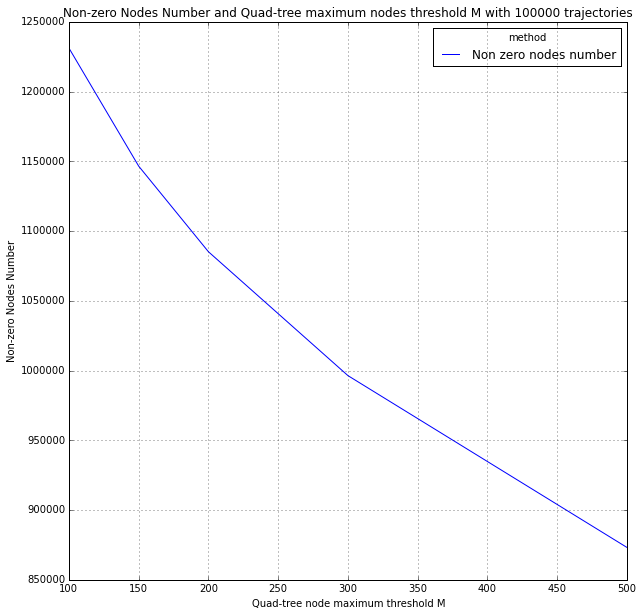

In [12]:
d1 = nd[['max_nodes']].copy()
d1['value'] = nd['non_zero_num']
d1['method'] = ['Non zero nodes number']*len(d1)
d1.index = ['Non zero nodes number']*len(d1)

e = pd.Series(d1['value'].values, index=[d1['max_nodes'],d1['method']])
f = pd.DataFrame(e.unstack())
a = f.plot(figsize=(10,10), title = 'Non-zero Nodes Number and Quad-tree maximum nodes threshold M with 100000 trajectories')
a.set_ylabel('Non-zero Nodes Number')
a.set_xlabel('Quad-tree node maximum threshold M')

In [13]:
d2 = nd[['max_nodes']].copy()
d2['value'] = nd['volume']
d2['method'] = ['Matrix size']*len(_d1)
d2.index = ['Matrix size']*len(_d1)

e = pd.Series(d2['value'].values, index=[d2['max_nodes'],d2['method']])
f = pd.DataFrame(e.unstack())
a = f.plot(figsize=(10,10), title = 'Matrix Size with 100000 Trajectories')
a.set_ylabel('Matrix cell number')
a.set_xlabel('Quad tree node maximum threshold M')

NameError: name '_d1' is not defined

# Bitlist Size and Number of Trajectories

In [14]:
df = dataframe.ix[['bits_sort', 'bits_origin', 'bits_random', 'bits_tree_dfs_depth', 'bits_tree_dfs']]
def plot_compress_rate(dtype, df):
    d = df[df.type == dtype].copy()
    for w in [16,32,64]:
        w = str(w)
        #e = pd.Series(d[w].values, index=[d['volume'], d['method']])
        #f = pd.DataFrame(e.unstack())
        #f.plot(figsize=(10,10), title = 'Bits number in width '+w)
        e = pd.Series(d['size_'+w].values, index=[d['traj_num'], d['method']])
        f = pd.DataFrame(e.unstack())
        a = f.plot(figsize=(10,10), title = 'Size in Bitlist Base B = '+w+' with max_nodes threshold = 100')
        a.set_ylabel('Bitlist size (mb)')
        a.set_xlabel('Number of Trajectories')

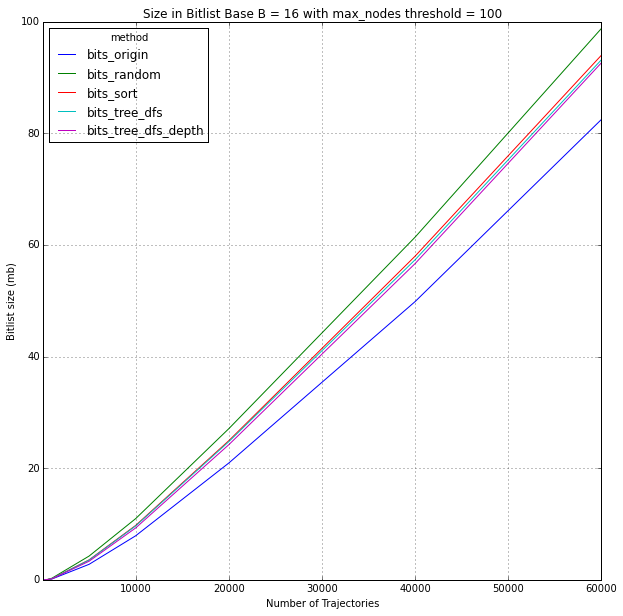

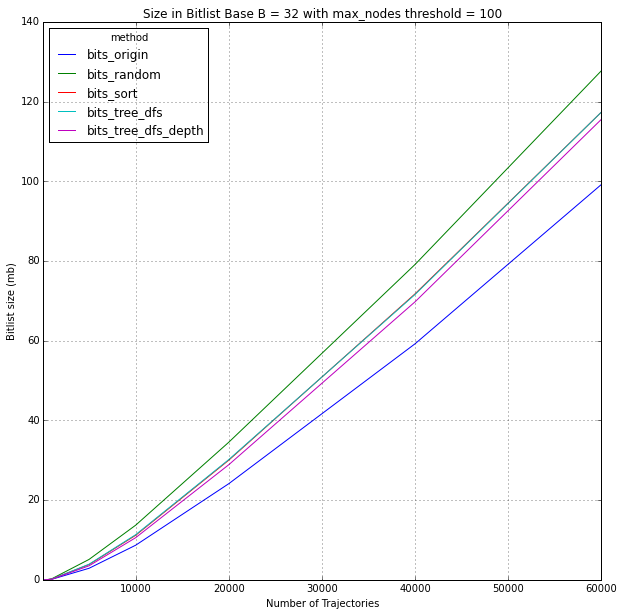

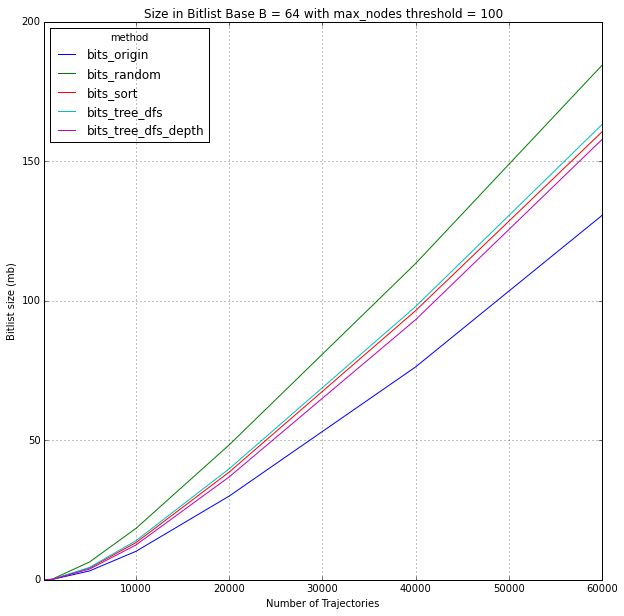

In [16]:
d = df[(df.type == 'short') & (df.max_nodes == 100) & (df.traj_num <= 60000)].copy()
plot_compress_rate('short',d)

# Max Nodes and Bitlist Size

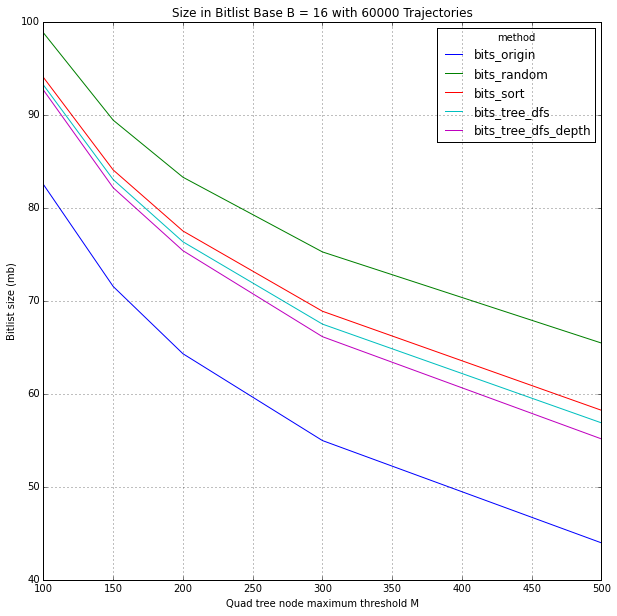

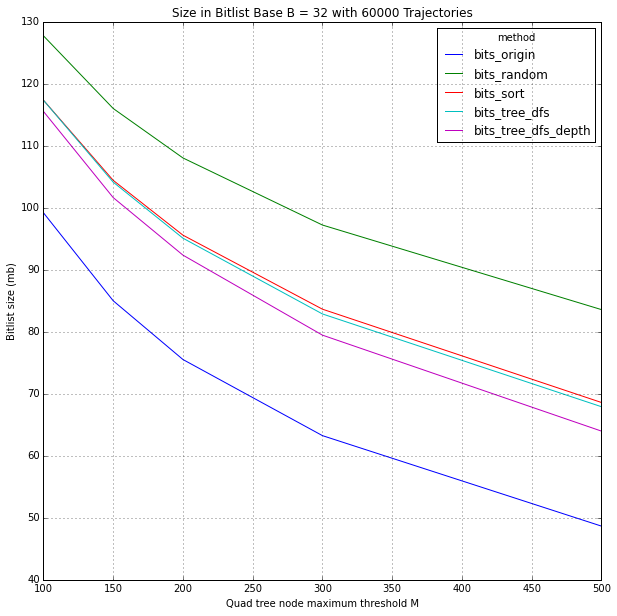

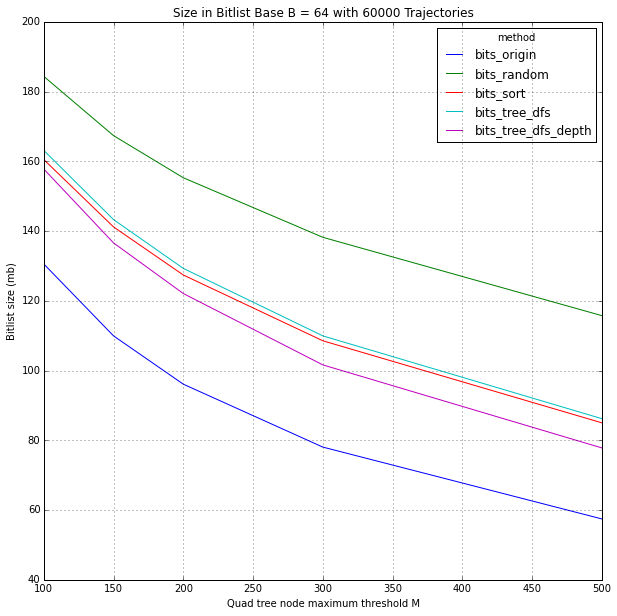

In [17]:
traj_num = 60000
df = dataframe.ix[['bits_sort', 'bits_origin', 'bits_random', 'bits_tree_dfs_depth', 'bits_tree_dfs']]
def plot_compress_rate(dtype, df):
    d = df[df.type == dtype].copy()
    for w in [16,32,64]:
        w = str(w)
        #e = pd.Series(d[w].values, index=[d['volume'], d['method']])
        #f = pd.DataFrame(e.unstack())
        #f.plot(figsize=(10,10), title = 'Bits number in width '+w)
        e = pd.Series(d['size_'+w].values, index=[d['max_nodes'], d['method']])
        f = pd.DataFrame(e.unstack())
        a = f.plot(figsize=(10,10), title = 'Size in Bitlist Base B = '+w+' with '+str(traj_num)+' Trajectories')
        a.set_ylabel('Bitlist size (mb)')
        a.set_xlabel('Quad tree node maximum threshold M')
d = df[(df.type == 'short') & (df.traj_num == traj_num)].copy()
plot_compress_rate('short',d)

# Build Bitlist Time

In [18]:
df = dataframe.ix[['bits_origin_time', 'bits_tree_dfs_time', 'bits_tree_dfs_depth_time', 'bits_sort_time']]

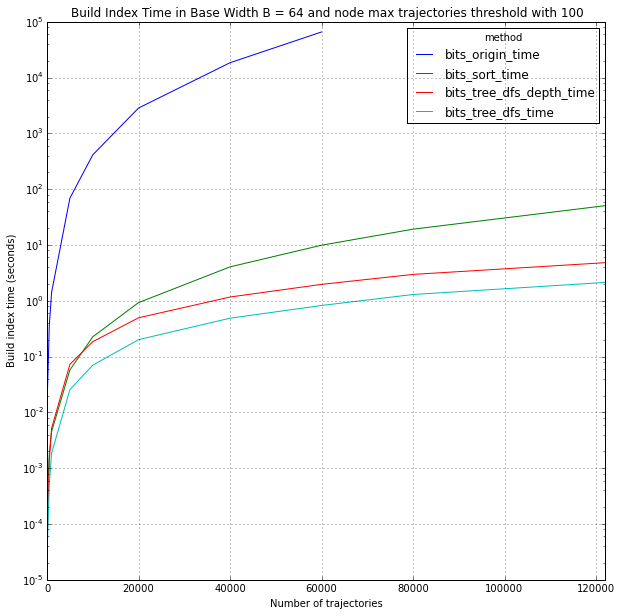

In [19]:
d = df[(df.type == 'short') & (df.max_nodes == 100)].copy()
for w in [64]:
    w = str(w)
    e = pd.Series(d[w].values, index=[d['traj_num'], d['method']])
    f = pd.DataFrame(e.unstack())
    a = f.plot(figsize=(10,10), title = 'Build Index Time in Base Width B = '+w+' and node max trajectories threshold with 100')
    a.set_ylabel('Build index time (seconds)')
    a.set_xlabel('Number of trajectories')
    a.set_yscale('log')

# Bitlist size with different bit width

In [ ]:
def df_with_width(d, w):
    w = str(w)
    _d1 = d[['max_nodes']].copy()
    _d1['value'] = d['size_'+w]
    _d1['method'] = [i+'_'+w for i in d.index]
    _d1.index = [i+'_'+w for i in d.index]
    return _d1

In [ ]:
df = dataframe.ix[['bits_origin', 'bits_random', 'bits_tree_dfs_depth']]
d = df[(df.type == 'short') & (df.traj_num == 5000)].copy()
nd = pd.DataFrame()
for w in [4,64]:
    nd = pd.concat([nd, df_with_width(d, w)])
e = pd.Series(nd['value'].values, index=[nd['max_nodes'], nd['method']])
f = pd.DataFrame(e.unstack())
f.plot(figsize=(10,10), title = 'Bitlist size with different bit width',style=['b--','b-','g--','g-','r--','r-']).set_ylabel('size(mb)')

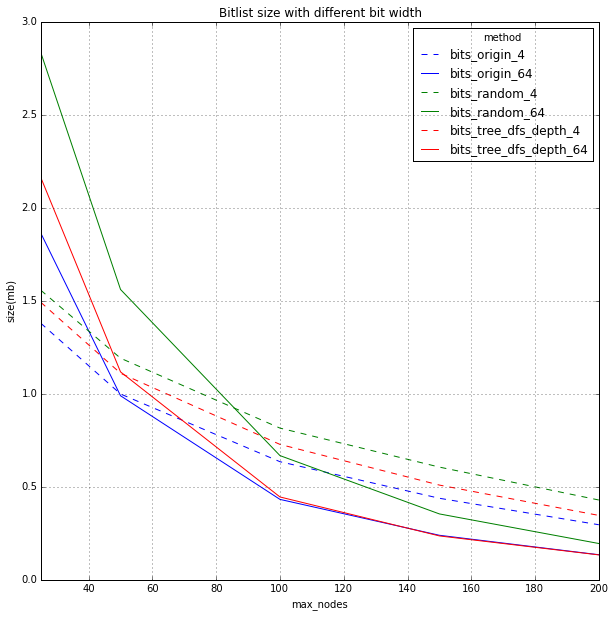

In [193]:
df = dataframe.ix[['bits_origin', 'bits_random', 'bits_tree_dfs_depth']]
d = df[(df.type == 'middle') & (df.traj_num == 1000)].copy()
nd = pd.DataFrame()
for w in [4,64]:
    nd = pd.concat([nd, df_with_width(d, w)])
e = pd.Series(nd['value'].values, index=[nd['max_nodes'], nd['method']])
f = pd.DataFrame(e.unstack())
f.plot(figsize=(10,10), title = 'Bitlist size with different bit width',style=['b--','b-','g--','g-','r--','r-']).set_ylabel('size(mb)')

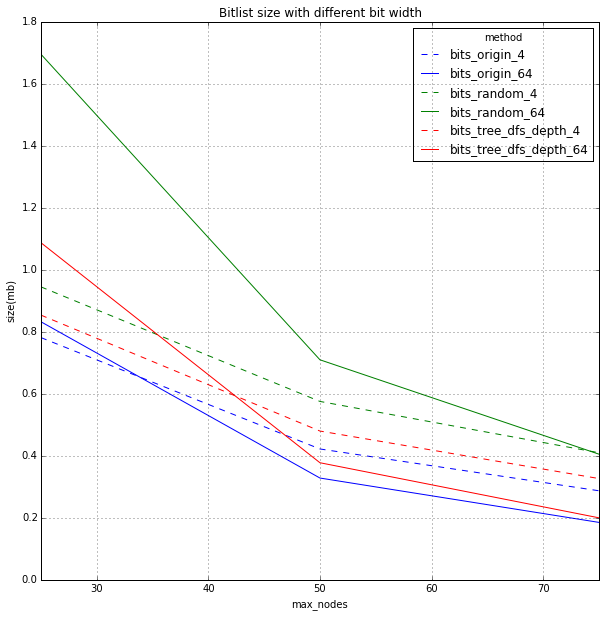

In [194]:
df = dataframe.ix[['bits_origin', 'bits_random', 'bits_tree_dfs_depth']]
d = df[(df.type == 'long') & (df.traj_num == 1000)].copy()
nd = pd.DataFrame()
for w in [4,64]:
    nd = pd.concat([nd, df_with_width(d, w)])
    
e = pd.Series(nd['value'].values, index=[nd['max_nodes'], nd['method']])
f = pd.DataFrame(e.unstack())
f.plot(figsize=(10,10), title = 'Bitlist size with different bit width',style=['b--','b-','g--','g-','r--','r-']).set_ylabel('size(mb)')

In [20]:
d = dataframe[dataframe.type=='short'].ix[['bits_tree_dfs_depth']][['non_zero_rate','size_4','size_8','size_16','size_32','size_64']]
d.sort(['non_zero_rate'])

,non_zero_rate,size_4,size_8,size_16,size_32,size_64
bits_tree_dfs_depth,0.000320,168.997673,183.289810,212.199051,269.004272,377.108917
bits_tree_dfs_depth,0.000488,106.266895,114.946274,132.379349,166.389160,229.771088
bits_tree_dfs_depth,0.000653,74.800289,80.743813,92.660065,115.547424,157.758820
bits_tree_dfs_depth,0.000980,66.864727,71.933151,82.155853,101.646729,136.592285
bits_tree_dfs_depth,0.000995,46.422775,49.850830,56.675858,69.765137,93.193542
bits_tree_dfs_depth,0.001033,26.464714,28.262627,31.861313,38.751953,51.217346
bits_tree_dfs_depth,0.001313,61.779774,66.272552,75.390793,92.366150,122.083923
bits_tree_dfs_depth,0.001495,41.125374,44.018997,49.734009,60.557434,79.198883
bits_tree_dfs_depth,0.001595,116.414955,124.716057,141.206818,171.885864,224.276459
bits_tree_dfs_depth,0.001982,91.443764,97.419510,109.504303,131.676636,168.623566


In [229]:
dataframe.d = dataframe.ix[['bits_random']][['traj_num','max_nodes','leaf_number','non_zero_rate','size_4','size_8','size_16','size_32','size_64']]
d.sort(['non_zero_rate'])

,traj_num,max_nodes,leaf_number,non_zero_rate,size_4,size_8,size_16,size_32,size_64
bits_tree_dfs_depth,5000,25,11962,0.002215,4.364010,4.694176,5.345032,6.557312,8.681030
bits_tree_dfs_depth,5000,50,13795,0.004224,9.627834,10.321655,11.645782,14.104675,18.082855
bits_tree_dfs_depth,5000,50,5146,0.004397,3.619171,3.803635,4.180984,4.863708,5.938110
bits_tree_dfs_depth,5000,100,5768,0.008527,7.925468,8.270073,8.950699,10.103882,11.787689
bits_tree_dfs_depth,5000,100,2024,0.009179,2.838524,2.863541,2.955460,3.146851,3.461243
bits_tree_dfs_depth,1000,20,1891,0.009493,0.561127,0.576630,0.609512,0.676880,0.786713
bits_tree_dfs_depth,1000,25,3989,0.011607,1.492424,1.549873,1.672623,1.880310,2.162842
bits_tree_dfs_depth,1000,25,2315,0.012226,0.854118,0.851440,0.878906,0.932495,1.087646
bits_tree_dfs_depth,5000,150,1088,0.014707,2.355572,2.294540,2.261169,2.261536,2.319214
bits_tree_dfs_depth,500,20,2019,0.019256,0.606514,0.615196,0.637619,0.676880,0.736633


In [230]:
d = dataframe.ix[['bits_origin']][['traj_num','max_nodes','leaf_number','non_zero_rate','size_4','size_8','size_16','size_32','size_64']]
d.sort(['non_zero_rate'])

,traj_num,max_nodes,leaf_number,non_zero_rate,size_4,size_8,size_16,size_32,size_64
bits_origin,5000,25,11962,0.002215,4.107307,4.291153,4.732773,5.644653,7.289520
bits_origin,5000,50,13795,0.004224,8.994061,9.346161,10.252716,12.032654,15.271362
bits_origin,5000,50,5146,0.004397,3.346195,3.376961,3.579758,4.030518,4.895142
bits_origin,5000,100,5768,0.008527,7.244865,7.258644,7.644104,8.525513,10.066040
bits_origin,5000,100,2024,0.009179,2.565376,2.460251,2.446655,2.590271,2.888672
bits_origin,1000,20,1891,0.009493,0.523705,0.514603,0.524918,0.562073,0.658173
bits_origin,1000,25,3989,0.011607,1.379780,1.387062,1.447403,1.596375,1.864014
bits_origin,1000,25,2315,0.012226,0.781609,0.736427,0.730362,0.766602,0.832672
bits_origin,5000,150,1088,0.014707,2.074734,1.906052,1.824417,1.830994,1.928101
bits_origin,500,20,2019,0.019256,0.559925,0.553551,0.561264,0.607422,0.682983


In [280]:
dataframe['method']

bits_origin                              bits_origin
bits_origin_time                    bits_origin_time
bits_random                              bits_random
bits_sort                                  bits_sort
bits_tree_dfs                          bits_tree_dfs
bits_tree_dfs_depth              bits_tree_dfs_depth
bits_tree_dfs_depth_time    bits_tree_dfs_depth_time
bits_tree_dfs_time                bits_tree_dfs_time
bits_unsort                              bits_unsort
bits_origin                              bits_origin
bits_origin_time                    bits_origin_time
bits_random                              bits_random
bits_sort                                  bits_sort
bits_tree_dfs                          bits_tree_dfs
bits_tree_dfs_depth              bits_tree_dfs_depth
...
bits_sort                                  bits_sort
bits_tree_dfs                          bits_tree_dfs
bits_tree_dfs_depth              bits_tree_dfs_depth
bits_tree_dfs_depth_time    bits_tree_dfs_

In [2]:
A = bitlist.read_A(5000, 100, 'short')

In [5]:
%time bitlist.filled_bits(A, 4)

CPU times: user 4.88 s, sys: 101 ms, total: 4.98 s
Wall time: 4.81 s


91085

In [23]:
%time filled_bits(A, 4)

CPU times: user 280 ms, sys: 3.88 ms, total: 284 ms
Wall time: 283 ms


91085

In [6]:
%time bitlist.filled_bits(A, 64)

CPU times: user 3.37 s, sys: 70 ms, total: 3.44 s
Wall time: 3.31 s


65810

In [22]:
%time filled_bits(A, 64)

CPU times: user 243 ms, sys: 3.92 ms, total: 247 ms
Wall time: 246 ms


65810

In [21]:
def filled_bits(M, _interval):
    n = 0
    total = 0
    t_num = M.shape[1]
    c_num = M.shape[0]
    bits_set = set()
    cids = M.nonzero()[0]
    t_columns = np.floor(M.nonzero()[1]*1.0/_interval)
    for c,t in zip(cids, t_columns):
        bits_set.add((c,t))
    return len(bits_set)

In [10]:
for c,y in zip(A.nonzero()[0], A.nonzero()[1]):
    print x,y
    break

0 2057


In [14]:
A.nonzero()[1]/4.0

array([  514.25,   624.5 ,   945.25, ...,   112.  ,  1127.75,  1119.75])

In [15]:
np.ceil(A.nonzero()[1]/4.0)

array([  515.,   625.,   946., ...,   112.,  1128.,  1120.])

In [24]:
%time sum(A[:,10])

CPU times: user 1.98 ms, sys: 34.8 ms, total: 36.8 ms
Wall time: 477 ms


1.0

In [25]:
%time np.sum(A[:,10])

CPU times: user 0 ns, sys: 1.01 ms, total: 1.01 ms
Wall time: 3.76 ms


1.0

In [26]:
dataframe.columns

Index([u'16', u'32', u'4', u'64', u'8', u'leaf_number', u'max_nodes', u'non_zero_num', u'traj_num', u'type', u'method', u'non_zero_sqrt', u'volume', u'compress_rate_4', u'compress_rate_8', u'compress_rate_16', u'compress_rate_32', u'compress_rate_64', u'size_4', u'size_8', u'size_16', u'size_32', u'size_64', u'non_zero_rate'], dtype='object')

In [27]:
df = dataframe[['4','8','16','32','64','volume','non_zero_num']]
df.ix['bits_origin_time'].sort('volume')

,4,8,16,32,64,volume,non_zero_num
bits_origin_time,0.020981,0.027295,0.035482,0.037195,0.048299,800,162
bits_origin_time,0.027416,0.034217,0.041047,0.046352,0.053440,1200,284
bits_origin_time,0.013752,0.021668,0.030586,0.039734,0.050630,4200,370
bits_origin_time,0.022684,0.034255,0.045943,0.061014,0.070377,10400,1144
bits_origin_time,0.034538,0.049772,0.063902,0.079347,0.092876,19100,2167
bits_origin_time,0.286398,0.446081,0.642295,0.858015,1.111967,81000,4366
bits_origin_time,0.366684,0.576865,0.788934,1.020121,1.222064,109500,6136
bits_origin_time,2.478830,3.390540,4.187037,4.886625,5.588903,142000,15442
bits_origin_time,1.035420,1.635685,2.379442,3.138992,3.838797,165000,8366
bits_origin_time,1.131496,1.573642,2.030898,2.523160,2.903035,256000,13182


In [ ]:
dataframe.ix['bits_origin_time'].sort

In [82]:
import sys

In [38]:
from pympler import asizeof

In [39]:
import quad
reload(quad)
time_interval, Q = bitlist.read_Q(100, 100, 'short')

In [40]:
time_interval

0.8942408561706543

In [41]:
asizeof.asizeof(Q)/1024.0

650.5078125

In [42]:
_Q = copy.deepcopy(Q)
_Q.remove_trajectories()
asizeof.asizeof(_Q)/1024.0

23.375

In [20]:
import copy